In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import scipy.stats as stats

In [2]:
## Import Ergast API csv's

circuits = pd.read_csv("Datasets/circuits.csv")
constructor_results = pd.read_csv("Datasets/constructor_results.csv")
constructor_standings = pd.read_csv("Datasets/constructor_standings.csv")
constructors = pd.read_csv("Datasets/constructors.csv")
driver_standings = pd.read_csv("Datasets/driver_standings.csv")
drivers = pd.read_csv("Datasets/drivers.csv")
lap_times = pd.read_csv("Datasets/lap_times.csv")
pit_stops = pd.read_csv("Datasets/pit_stops.csv")
qualifying = pd.read_csv("Datasets/qualifying.csv")
races = pd.read_csv("Datasets/races.csv")
results = pd.read_csv("Datasets/results.csv")
seasons = pd.read_csv("Datasets/seasons.csv")
sprint_results = pd.read_csv("Datasets/sprint_results.csv")
status = pd.read_csv("Datasets/status.csv")
weather = pd.read_csv("Datasets/weather.csv")

In [3]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
## Joining datasets
driver_results = pd.merge(results,drivers, how='left',on='driverId')
driver_results_races = pd.merge(driver_results,races, how='left', on='raceId')
driver_results_races_circuits = pd.merge(driver_results_races,circuits, how='left', on='circuitId')
driver_results_races_circuits_status = pd.merge(driver_results_races_circuits,status, how='left', on='statusId')
merged_F1 = pd.merge(driver_results_races_circuits_status,constructors, how='left', on='constructorId')

C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_23288\2848540835.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_F1 = pd.merge(driver_results_races_circuits_status,constructors, how='left', on='constructorId')


In [5]:
merged_F1.head(5)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,country,lat,lng,alt,url_x,status,constructorRef,name,nationality_y,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,3,5,2,2,2,8.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,7,3,3,3,6.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,5,11,4,4,4,5.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,23,3,5,5,5,4.0,...,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [6]:
merged_F1.columns.values.tolist()

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number_x',
 'grid',
 'position',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time_x',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'driverRef',
 'number_y',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality_x',
 'url_x',
 'year',
 'round',
 'circuitId',
 'name_x',
 'date',
 'time_y',
 'url_y',
 'fp1_date',
 'fp1_time',
 'fp2_date',
 'fp2_time',
 'fp3_date',
 'fp3_time',
 'quali_date',
 'quali_time',
 'sprint_date',
 'sprint_time',
 'circuitRef',
 'name_y',
 'location',
 'country',
 'lat',
 'lng',
 'alt',
 'url_x',
 'status',
 'constructorRef',
 'name',
 'nationality_y',
 'url_y']

In [7]:
driver_df = merged_F1.drop(['resultId','number_x','positionText','positionOrder','laps','time_x',
                           'fastestLap','rank','fastestLapTime','fastestLapSpeed','driverRef',
                           'number_y','code','url_x','url_y','fp1_date','fp1_time','fp2_date',
                            'fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date',
                            'sprint_time','circuitRef','name_y','location','lat','lng','alt','url_x',
                            'status','constructorRef','nationality_y','url_y'], axis = 1)

In [8]:
driver_df.head(10)

,raceId,driverId,constructorId,grid,position,points,milliseconds,statusId,forename,surname,dob,nationality_x,year,round,circuitId,name_x,date,time_y,country,name
0,18,1,1,1,1,10.0,5690616,1,Lewis,Hamilton,1985-01-07,British,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren
1,18,2,2,5,2,8.0,5696094,1,Nick,Heidfeld,1977-05-10,German,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,BMW Sauber
2,18,3,3,7,3,6.0,5698779,1,Nico,Rosberg,1985-06-27,German,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Williams
3,18,4,4,11,4,5.0,5707797,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Renault
4,18,5,1,3,5,4.0,5708630,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren
5,18,6,3,13,6,3.0,\N,11,Kazuki,Nakajima,1985-01-11,Japanese,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Williams
6,18,7,5,17,7,2.0,\N,5,Sébastien,Bourdais,1979-02-28,French,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Toro Rosso
7,18,8,6,15,8,1.0,\N,5,Kimi,Räikkönen,1979-10-17,Finnish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Ferrari
8,18,9,2,2,\N,0.0,\N,4,Robert,Kubica,1984-12-07,Polish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,BMW Sauber
9,18,10,7,18,\N,0.0,\N,3,Timo,Glock,1982-03-18,German,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Toyota


In [9]:
driver_df['position'] = driver_df['position'].replace({'\\N':0})
driver_df['position'] = pd.to_numeric(driver_df['position'])   ## convert \N values to numeric 0

driver_df["position"] = [int(i) for i in driver_df["position"]]
driver_df["winner"] = np.where(driver_df["position"]==1,1,0)  ## Using i loop to create winner column
driver_df

,raceId,driverId,constructorId,grid,position,points,milliseconds,statusId,forename,surname,...,nationality_x,year,round,circuitId,name_x,date,time_y,country,name,winner
0,18,1,1,1,1,10.0,5690616,1,Lewis,Hamilton,...,British,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren,1
1,18,2,2,5,2,8.0,5696094,1,Nick,Heidfeld,...,German,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,BMW Sauber,0
2,18,3,3,7,3,6.0,5698779,1,Nico,Rosberg,...,German,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Williams,0
3,18,4,4,11,4,5.0,5707797,1,Fernando,Alonso,...,Spanish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Renault,0
4,18,5,1,3,5,4.0,5708630,1,Heikki,Kovalainen,...,Finnish,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,1109,855,51,5,16,0.0,\N,11,Guanyu,Zhou,...,Chinese,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Alfa Romeo,0
26056,1109,825,210,19,17,0.0,\N,11,Kevin,Magnussen,...,Danish,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Haas F1 Team,0
26057,1109,858,3,20,0,0.0,\N,31,Logan,Sargeant,...,American,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Williams,0
26058,1109,839,214,12,0,0.0,\N,130,Esteban,Ocon,...,French,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Alpine F1 Team,0


In [10]:
driver_race_data = driver_df

podium = []
for i in driver_race_data["position"]:
    if (i==1)|(i==2)|(i==3):
        podium.append(1)
    else:
        podium.append(0)
        
driver_race_data["podium"] = podium
driver_race_data

,raceId,driverId,constructorId,grid,position,points,milliseconds,statusId,forename,surname,...,year,round,circuitId,name_x,date,time_y,country,name,winner,podium
0,18,1,1,1,1,10.0,5690616,1,Lewis,Hamilton,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren,1,1
1,18,2,2,5,2,8.0,5696094,1,Nick,Heidfeld,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,BMW Sauber,0,1
2,18,3,3,7,3,6.0,5698779,1,Nico,Rosberg,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Williams,0,1
3,18,4,4,11,4,5.0,5707797,1,Fernando,Alonso,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Renault,0,0
4,18,5,1,3,5,4.0,5708630,1,Heikki,Kovalainen,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,1109,855,51,5,16,0.0,\N,11,Guanyu,Zhou,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Alfa Romeo,0,0
26056,1109,825,210,19,17,0.0,\N,11,Kevin,Magnussen,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Haas F1 Team,0,0
26057,1109,858,3,20,0,0.0,\N,31,Logan,Sargeant,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Williams,0,0
26058,1109,839,214,12,0,0.0,\N,130,Esteban,Ocon,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Alpine F1 Team,0,0


In [11]:
driver_race_data['milliseconds'] = driver_race_data['milliseconds'].replace({'\\N':0})
driver_race_data['milliseconds'] = pd.to_numeric(driver_race_data['milliseconds'])

In [12]:
driver_race_data

,raceId,driverId,constructorId,grid,position,points,milliseconds,statusId,forename,surname,...,year,round,circuitId,name_x,date,time_y,country,name,winner,podium
0,18,1,1,1,1,10.0,5690616,1,Lewis,Hamilton,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren,1,1
1,18,2,2,5,2,8.0,5696094,1,Nick,Heidfeld,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,BMW Sauber,0,1
2,18,3,3,7,3,6.0,5698779,1,Nico,Rosberg,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Williams,0,1
3,18,4,4,11,4,5.0,5707797,1,Fernando,Alonso,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Renault,0,0
4,18,5,1,3,5,4.0,5708630,1,Heikki,Kovalainen,...,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,1109,855,51,5,16,0.0,0,11,Guanyu,Zhou,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Alfa Romeo,0,0
26056,1109,825,210,19,17,0.0,0,11,Kevin,Magnussen,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Haas F1 Team,0,0
26057,1109,858,3,20,0,0.0,0,31,Logan,Sargeant,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Williams,0,0
26058,1109,839,214,12,0,0.0,0,130,Esteban,Ocon,...,2023,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Alpine F1 Team,0,0


In [13]:
## Must update team names to most recent changes

driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Aston Martin' if x=='Racing Point' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Aston Martin' if x=='Force India' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alpine' if x=='Lotus F1' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alpine' if x=='Renault' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'AlphaTauri' if x=='Renault' else x)

In [14]:
driver_race_data.shape

(26060, 22)

In [15]:
driver_race_data.columns.values.tolist()

['raceId',
 'driverId',
 'constructorId',
 'grid',
 'position',
 'points',
 'milliseconds',
 'statusId',
 'forename',
 'surname',
 'dob',
 'nationality_x',
 'year',
 'round',
 'circuitId',
 'name_x',
 'date',
 'time_y',
 'country',
 'name',
 'winner',
 'podium']

In [16]:
driver_race_data.rename(columns={'name_x':'GP_name','name':'constructor_name','grid':'starting_position',
                                 'position':'finishing_position','nationality_x':'driver_nationality'}, inplace=True)
driver_race_data['driver'] = driver_race_data['forename']+' '+driver_race_data['surname']
driver_race_data['dob'] = pd.to_datetime(driver_race_data['dob'],format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

driver_race_data.drop(['forename','surname'], axis=1)

,raceId,driverId,constructorId,starting_position,finishing_position,points,milliseconds,statusId,dob,driver_nationality,...,round,circuitId,GP_name,date,time_y,country,constructor_name,winner,podium,driver
0,18,1,1,1,1,10.0,5690616,1,07/01/1985,British,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren,1,1,Lewis Hamilton
1,18,2,2,5,2,8.0,5696094,1,10/05/1977,German,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,BMW Sauber,0,1,Nick Heidfeld
2,18,3,3,7,3,6.0,5698779,1,27/06/1985,German,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Williams,0,1,Nico Rosberg
3,18,4,4,11,4,5.0,5707797,1,29/07/1981,Spanish,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,Alpine,0,0,Fernando Alonso
4,18,5,1,3,5,4.0,5708630,1,19/10/1981,Finnish,...,1,1,Australian Grand Prix,16/03/2008,04:30:00,Australia,McLaren,0,0,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,1109,855,51,5,16,0.0,0,11,30/05/1999,Chinese,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Alfa Romeo,0,0,Guanyu Zhou
26056,1109,825,210,19,17,0.0,0,11,05/10/1992,Danish,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Haas F1 Team,0,0,Kevin Magnussen
26057,1109,858,3,20,0,0.0,0,31,31/12/2000,American,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Williams,0,0,Logan Sargeant
26058,1109,839,214,12,0,0.0,0,130,17/09/1996,French,...,11,11,Hungarian Grand Prix,23/07/2023,13:00:00,Hungary,Alpine F1 Team,0,0,Esteban Ocon


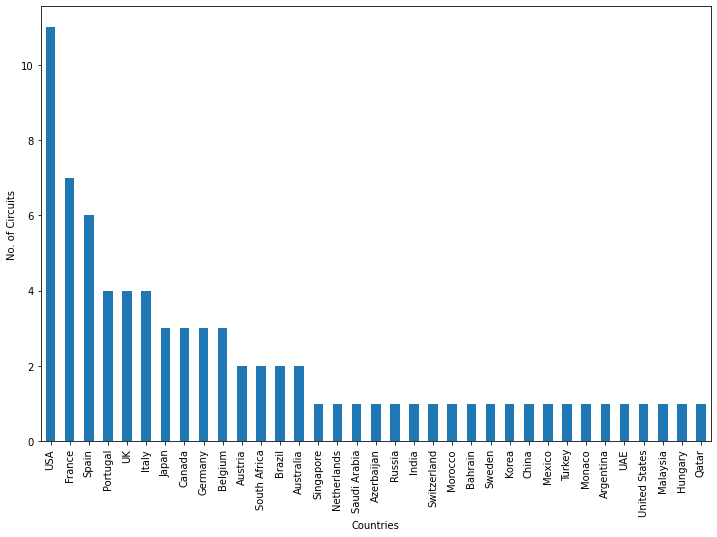

In [17]:
## Plot the number of circuits per country

fig, ax = plt.subplots(figsize=(12,8))

circuits['country'].value_counts().plot.bar(ax=ax)

ax.set_xlabel("Countries")
ax.set_ylabel("No. of Circuits")
ax.figure.savefig('Circuits per country.png', dpi=300)

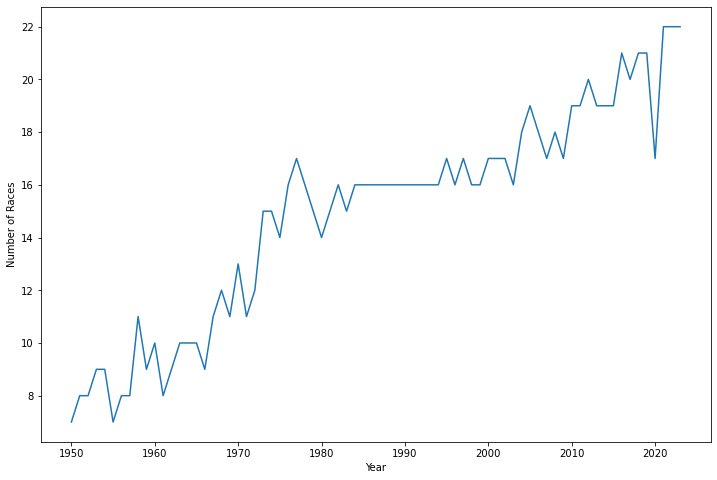

In [18]:
## Getting the number of races per year now

years = races.groupby('year').round.max().reset_index()['year'].tolist()
rounds = races.groupby('year').round.max().reset_index()['round'].tolist()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(years, rounds)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Races")
ax.figure.savefig('Number of races per year.png', dpi=300)

In [25]:
# Creating race wins graph for last 20 years
race_wins = driver_race_data.loc[(driver_race_data['year']>=2002) & (driver_race_data['year']<2023) & (driver_race_data['finishing_position']!=0)]
race_wins_total = race_wins.groupby(['driver'])['finishing_position'].count().sort_values(ascending=False)

driver_wins = driver_race_data.loc[(driver_race_data['year']>=2002) & (driver_race_data['year']<2023) & (driver_race_data['finishing_position']==1)]
driver_wins_total = driver_wins.groupby(['driver'])['finishing_position'].count().sort_values(ascending=False)

perc_wins = pd.merge(race_wins_total,driver_wins_total, how='left', on='driver')
perc_wins = perc_wins.rename(columns={'finishing_position_x':'races','finishing_position_y':'wins'})
perc_wins['win_percent'] = ((perc_wins['wins'] / perc_wins['races']) * 100)
perc_wins = perc_wins.sort_values(ascending=False, by='win_percent')

## Converting index to list 
x_axis = perc_wins.index.tolist()
y_axis = perc_wins.groupby(['driver'], sort=False)['win_percent'].sum().sort_values(ascending=False)

<Figure size 432x288 with 0 Axes>

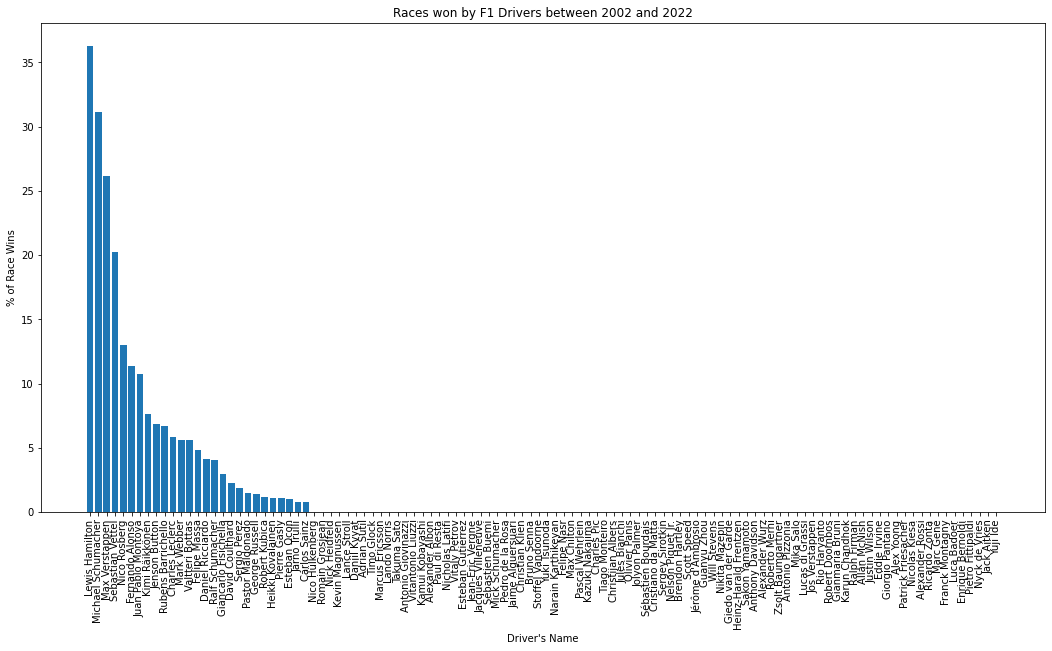

In [30]:
fig = plt.figure()
plt.figure(figsize=(18,9))
plt.bar(x_axis, y_axis)
plt.title('Races won by F1 Drivers between 2002 and 2022')
plt.xlabel("Driver's Name")
plt.ylabel("% of Race Wins")
plt.xticks(rotation=90);
plt.savefig('Percentage of Wins per Driver.png', dpi=300)